# Imports 

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from matplotlib import pyplot as plt

# Read in Data

* Financial Data (2022/2023 NBA season)
* City Data
* World Data

In [41]:
financials = pd.read_excel('Given_Data/NBA_financial_data.xlsx')    #
cities = pd.read_excel('Given_Data/us_city_data.xlsx', nrows=500)   # grab first 500 rows

display(financials.head(30))
# display(cities.head())
# display(cities.describe())
#display(financials.describe())

,City,State,Team Name,Arena Sponsor,Arena Cost (millions),Year of Arena Construction,Arena Capacity,Jersey Sponsor,022/2023 Revenue (millions),022/2023 Operating Income (millions),022/2023 Player Expenses (millions),2019 Ticket Revenue
0,Atlanta,Georgia,Atlanta Hawks,State Farm,213.5,1999,16600,YMCA,326,85,159,45.3
1,Boston,Massachusetts,Boston Celtics,TD Bank,160.0,1995,19156,Vistaprint,443,88,185,72.5
2,Brooklyn,New York,Brooklyn Nets,Barclays Bank,1000.0,2012,17732,Webull,367,-5,187,55.1
3,Charlotte,North Carolina,Charlotte Hornets,Spectrum,260.0,2005,19077,Feastables,269,35,165,23.7
4,Chicago,Illinois,Chicago Bulls,United Airlines,175.0,1994,20917,Motorola,372,115,158,70.0
5,Cleveland,Ohio,Cleveland Cavaliers,Rocket Mortgage,100.0,1994,19432,Clevland-Cliffs Inc.,348,78,158,67.4
6,Dallas,Texas,Dallas Mavericks,American Airlines,420.0,2001,19200,Chime,429,83,177,57.4
7,Denver,Colorado,Denver Nuggets,Ball Corp,187.0,1999,19520,Ibotta,348,71,171,41.6
8,Detroit,Michigan,Detroit Pistons,Little Caesers,862.9,2017,20332,United Wholesale Mortgage,274,83,132,35.8
9,San Francisco,California,Golden State Warriors,JPMorgan Chase,1400.0,2019,18064,Rakuten,765,79,197,100.4


# Merging Datasets

Merged the financials and city dataset together

In [9]:
# preprocessing data
#financials["City"] = financials["City"].str.lower().str.strip()

# remove any whitespace in the city names
cities["city"] = cities["city"].str.replace(" ", "")
financials["City"] = financials["City"].str.replace(" ", "")

# merged data
merged_df = pd.merge(financials, cities, left_on=["City", "State"], right_on=["city", "state_name"], how="inner")

# see what cities are not included
set(financials["City"]) - set(merged_df["City"])

{'Toronto'}

# Data Exploration

Distribution of Revnues, Operating Income, and Player Expense

note that there are salary caps in the NBA that limits player expenses

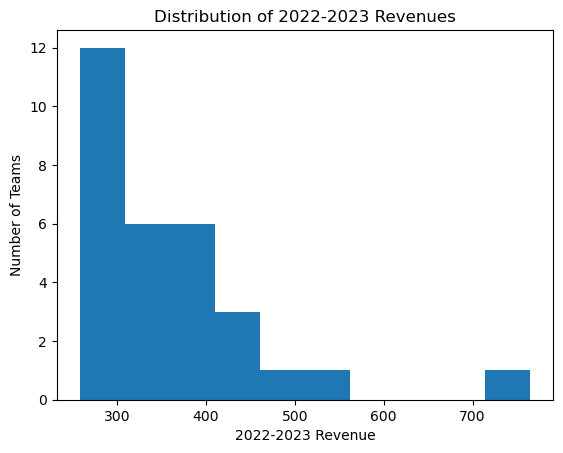

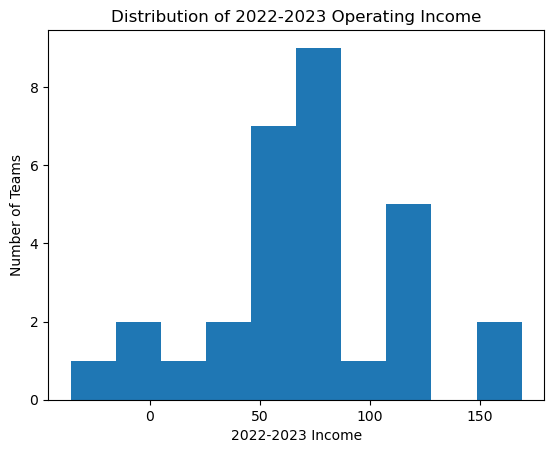

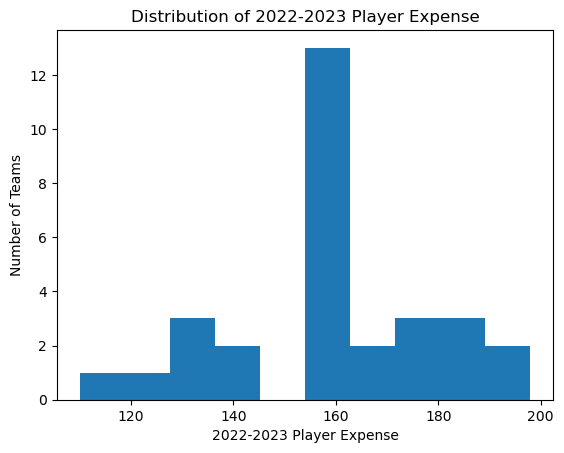

In [39]:
fig, ax = plt.subplots()
counts, bins = np.histogram(financials["022/2023 Revenue (millions)"])
ax.hist(bins[:-1], bins, weights=counts)
ax.set_title("Distribution of 2022-2023 Revenues")
ax.set_xlabel("2022-2023 Revenue")
ax.set_ylabel("Number of Teams")
plt.show()

fig, ax = plt.subplots()
counts, bins = np.histogram(financials["022/2023 Operating Income (millions)"])
ax.hist(bins[:-1], bins, weights=counts)
ax.set_title("Distribution of 2022-2023 Operating Income")
ax.set_xlabel("2022-2023 Income")
ax.set_ylabel("Number of Teams")
plt.show()

fig, ax = plt.subplots()
counts, bins = np.histogram(financials["022/2023 Player Expenses (millions)"])
ax.hist(bins[:-1], bins, weights=counts)
ax.set_title("Distribution of 2022-2023 Player Expense")
ax.set_xlabel("2022-2023 Player Expense")
ax.set_ylabel("Number of Teams")
plt.show()


In [11]:

merged_df.columns[merged_df.isna().sum() > 0]   # check to see what columns have NA values
#merged_df[["City", "income_household_median"]]


Index(['Jersey Sponsor', 'city_alt', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80',
       'age_over_65', 'age_18_to_24', 'age_over_18', 'male', 'female',
       'married', 'divorced', 'never_married', 'widowed', 'family_size',
       'family_dual_income', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'income_household_150_over',
       'income_household_six_figure', 'income_individual_median',
       'home_ownership', 'housing_units', 'home_value', 'rent_median',
       'rent_burden', 'education_less_highschool', 'education_highschool',
       'education_some_college', 'education_bachelors', 'education_graduate',
       'education_college

In [6]:
cov_matrix = merged_df.cov()
#display(cov_matrix)
display(cov_matrix.loc["022/2023 Revenue (millions)",:].tail(50))

/var/folders/x2/67qpprrj1yg71spwg0l_zx8c0000gn/T/ipykernel_86828/2383887409.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cov_matrix = merged_df.cov()


divorced                      -1.238407e+02
never_married                  5.737037e+00
widowed                        5.411111e+00
family_size                   -1.161852e+00
family_dual_income             2.116296e+02
income_household_median        1.280614e+06
income_household_under_5      -3.528519e+01
income_household_5_to_10      -1.718519e+01
income_household_10_to_15     -1.887407e+01
income_household_15_to_20     -3.456667e+01
income_household_20_to_25     -3.294444e+01
income_household_25_to_35     -8.600741e+01
income_household_35_to_50     -1.515963e+02
income_household_50_to_75     -1.733037e+02
income_household_75_to_100    -6.451852e+01
income_household_100_to_150    3.851852e+00
income_household_150_over      6.123741e+02
income_household_six_figure    6.162259e+02
income_individual_median       4.588508e+05
home_ownership                -4.450519e+02
housing_units                  3.126479e+07
home_value                     2.426292e+07
rent_median                    2

In [7]:
for column in merged_df.columns:
    print(column)

City
State
Team Name
Arena Sponsor
Arena Cost (millions)
Year of Arena Construction
Arena Capacity
Jersey Sponsor
022/2023 Revenue (millions)
022/2023 Operating Income (millions)
022/2023 Player Expenses (millions)
2019 Ticket Revenue
city
city_ascii
city_alt
state_id
state_name
county_fips
county_name
county_fips_all
county_name_all
lat
lng
population
population_proper
density
source
military
incorporated
cdp
township
timezone
ranking
zips
id
age_median
age_under_10
age_10_to_19
age_20s
age_30s
age_40s
age_50s
age_60s
age_70s
age_over_80
age_over_65
age_18_to_24
age_over_18
male
female
married
divorced
never_married
widowed
family_size
family_dual_income
income_household_median
income_household_under_5
income_household_5_to_10
income_household_10_to_15
income_household_15_to_20
income_household_20_to_25
income_household_25_to_35
income_household_35_to_50
income_household_50_to_75
income_household_75_to_100
income_household_100_to_150
income_household_150_over
income_household_six_figu

# Regression Analysis

                                 OLS Regression Results                                
Dep. Variable:     022/2023 Revenue (millions)   R-squared:                       0.442
Model:                                     OLS   Adj. R-squared:                  0.422
Method:                          Least Squares   F-statistic:                     21.43
Date:                         Sun, 31 Mar 2024   Prob (F-statistic):           8.26e-05
Time:                                 17:24:07   Log-Likelihood:                 7.4665
No. Observations:                           29   AIC:                            -10.93
Df Residuals:                               27   BIC:                            -8.198
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

MissingDataError: exog contains inf or nans

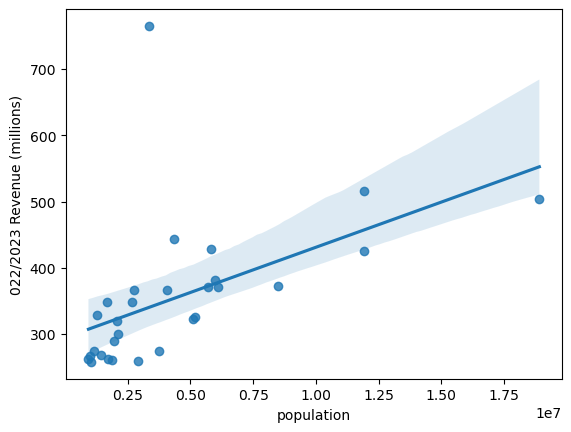

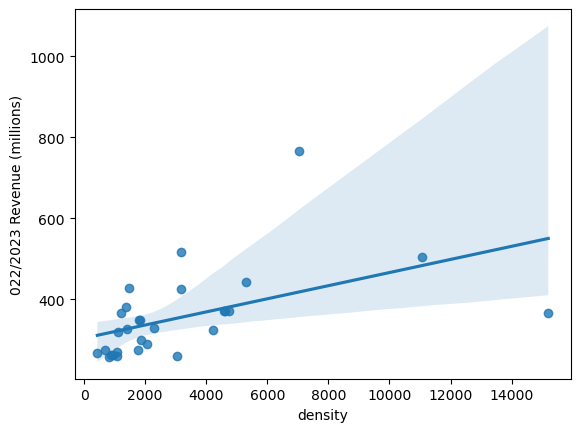

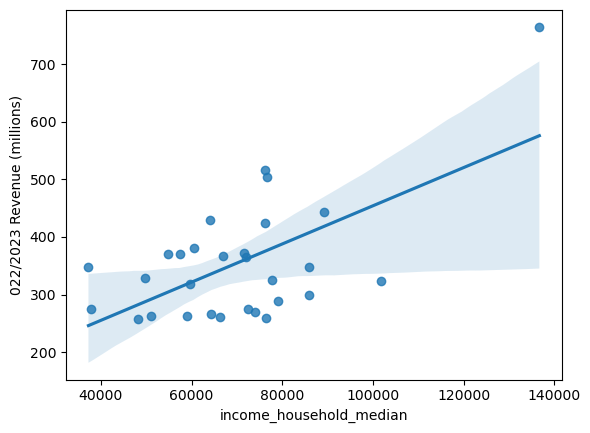

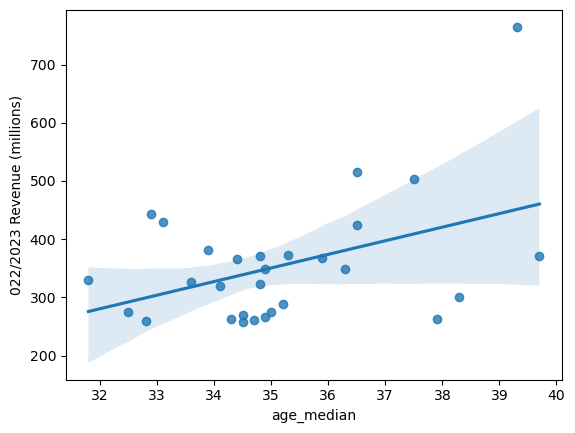

In [8]:
X = np.log(merged_df["population"])
X = sm.add_constant(X)
y = np.log(merged_df["022/2023 Revenue (millions)"])
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
fig, ax = plt.subplots()
sns.regplot(x="population", y="022/2023 Revenue (millions)", data=merged_df, ax=ax)

X = np.log(merged_df["density"])
X = sm.add_constant(X)
y = np.log(merged_df["022/2023 Revenue (millions)"])
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
fig, ax = plt.subplots()
sns.regplot(x="density", y="022/2023 Revenue (millions)", data=merged_df, ax=ax)

X = np.log(merged_df["income_household_median"])
X = sm.add_constant(X)
y = np.log(merged_df["022/2023 Revenue (millions)"])
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
fig, ax = plt.subplots()
sns.regplot(x="income_household_median", y="022/2023 Revenue (millions)", data=merged_df, ax=ax)

X = np.log(merged_df["age_median"])
X = sm.add_constant(X)
y = np.log(merged_df["022/2023 Revenue (millions)"])
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
fig, ax = plt.subplots()
sns.regplot(x="age_median", y="022/2023 Revenue (millions)", data=merged_df, ax=ax)

X = np.log(merged_df["unemployment_rate"])
X = sm.add_constant(X)
y = np.log(merged_df["022/2023 Revenue (millions)"])
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
fig, ax = plt.subplots()
sns.regplot(x="unemployment_rate", y="022/2023 Revenue (millions)", data=merged_df, ax=ax)

In [ ]:
# stlouis = cities[cities["city"] == "St. Louis"]
city = "St. Louis"
state_id = "MO"
stlouis = cities.query("@city == city and @state_id == state_id")   # query/select St. Louis, Missouri
display(stlouis.melt().head(50))

,variable,value
0,city,St. Louis
1,city_ascii,St. Louis
2,city_alt,Saint Louis
3,state_id,MO
4,state_name,Missouri
5,county_fips,29510
6,county_name,St. Louis
7,county_fips_all,29510
8,county_name_all,St. Louis
9,lat,38.6359


In [ ]:
cities.sort_values(by="population", ascending=False).head(60)

,city,city_ascii,city_alt,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,...,poverty,limited_english,commute_time,health_uninsured,veteran,cbsa_fips,cbsa_name,cbsa_metro,csa_fips,csa_name
0,New York,New York,NaN,NY,New York,36081,Queens,36081|36047|36085|36005|36061,Queens|Kings|Richmond|Bronx|New York,40.6943,...,17.2,13.9,41.1,6.7,2.0,35620,"New York-Newark-Jersey City, NY-NJ-PA",True,408.0,"New York-Newark, NY-NJ-CT-PA"
1,Los Angeles,Los Angeles,NaN,CA,California,6037,Los Angeles,6037,Los Angeles,34.1141,...,16.6,13.7,31.3,10.6,2.3,31080,"Los Angeles-Long Beach-Anaheim, CA",True,348.0,"Los Angeles-Long Beach, CA"
2,Chicago,Chicago,NaN,IL,Illinois,17031,Cook,17031|17043,Cook|DuPage,41.8375,...,16.9,7.9,34.1,9.8,2.9,16980,"Chicago-Naperville-Elgin, IL-IN-WI",True,176.0,"Chicago-Naperville, IL-IN-WI"
3,Miami,Miami,NaN,FL,Florida,12086,Miami-Dade,12086,Miami-Dade,25.7840,...,20.0,29.9,28.2,19.0,2.0,33100,"Miami-Fort Lauderdale-Pompano Beach, FL",True,370.0,"Miami-Port St. Lucie-Fort Lauderdale, FL"
4,Houston,Houston,NaN,TX,Texas,48201,Harris,48201|48157|48339,Harris|Fort Bend|Montgomery,29.7860,...,19.6,13.5,27.4,24.2,3.6,26420,"Houston-The Woodlands-Sugar Land, TX",True,288.0,"Houston-The Woodlands, TX"
5,Dallas,Dallas,NaN,TX,Texas,48113,Dallas,48113|48397|48085|48257|48121,Dallas|Rockwall|Collin|Kaufman|Denton,32.7935,...,17.5,9.3,26.4,23.5,3.8,19100,"Dallas-Fort Worth-Arlington, TX",True,206.0,"Dallas-Fort Worth, TX-OK"
6,Philadelphia,Philadelphia,NaN,PA,Pennsylvania,42101,Philadelphia,42101,Philadelphia,40.0077,...,22.7,6.9,32.8,7.3,4.2,37980,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",True,428.0,"Philadelphia-Reading-Camden, PA-NJ-DE-MD"
7,Atlanta,Atlanta,NaN,GA,Georgia,13121,Fulton,13121|13089,Fulton|DeKalb,33.7628,...,17.7,2.0,27.5,10.8,4.3,12060,"Atlanta-Sandy Springs-Alpharetta, GA",True,122.0,"Atlanta--Athens-Clarke County--Sandy Springs, ..."
8,Washington DC,Washington DC,NaN,DC,District of Columbia,11001,District of Columbia,11001,District of Columbia,38.9047,...,15.1,3.1,30.5,3.4,4.0,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",True,548.0,"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA"
9,Boston,Boston,NaN,MA,Massachusetts,25025,Suffolk,25025,Suffolk,42.3188,...,17.5,11.2,30.6,3.3,2.4,14460,"Boston-Cambridge-Newton, MA-NH",True,148.0,"Boston-Worcester-Providence, MA-RI-NH-CT"
